# User overview analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from scripts.missing_percentage import percent_missing
from scripts.missing_filler import Cleaner as Cleaner
from scripts.data_summry import Summery as summery
from scripts.outlier import *
from scripts.type_format import Format as formater
import seaborn as sns

cleaner = Cleaner()
summery = summery()
formater=formater()
import os 
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#set path for files

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","telecom_clean_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

In [4]:
clean_data=pd.read_csv(data_path)

## Exploration of the data Handset type and Handset manufacture 

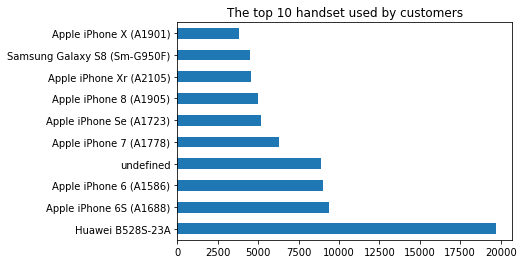

In [5]:
# Finding out the top 10 handset used by customers

handsets_df=clean_data['Handset Type'].value_counts()[:10].plot(kind='barh', title="The top 10 handset used by customers")

In [6]:
# finding top 3 handset manufacturer used by customers
Handset_manufacturer_df=clean_data['Handset Manufacturer'].value_counts()[:3]

In [7]:
Handset_manufacturer_df

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

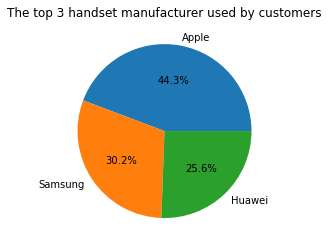

In [8]:
label = ["Apple", "Samsung", "Huawei"]


plt.pie(Handset_manufacturer_df, labels=label, autopct = '%1.1f%%')
plt.title("The top 3 handset manufacturer used by customers")
plt.show() 


<AxesSubplot:title={'center':'The top 5 handset for Apple company'}>

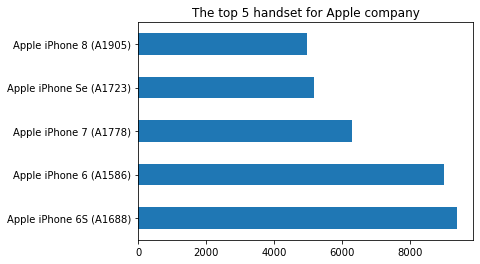

In [9]:
# Finding out top 5 handset for Apple company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Apple')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Apple company")



In [10]:
handset_manu_group.get_group('Apple')['Handset Type'].value_counts()[:5]

Apple iPhone 6S (A1688)    9395
Apple iPhone 6 (A1586)     8993
Apple iPhone 7 (A1778)     6279
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: Handset Type, dtype: int64

<AxesSubplot:title={'center':'The top 5 handset for Samsung company'}>

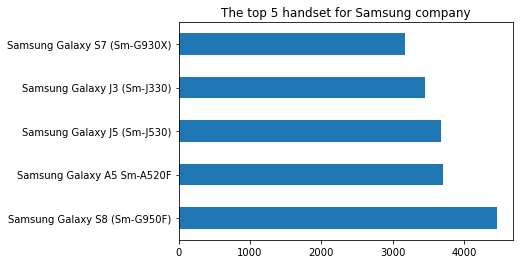

In [11]:
#the second one is sumsung
#finding out top 5 handset for Samsung company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Samsung')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Samsung company")



<AxesSubplot:title={'center':'The top 5 handset for Huawei company'}>

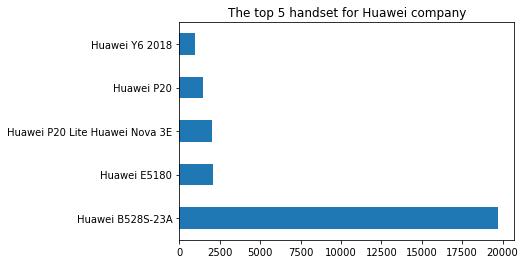

In [12]:
#the third one is Huawei
#finding out top 5 handset for Huawei company
handset_manu_group= clean_data.groupby(['Handset Manufacturer'])
handset_manu_group.get_group('Huawei')['Handset Type'].value_counts()[:5].plot(kind='barh', title="The top 5 handset for Huawei company")



## Observation 

1.The most frequently used handset is Huawei B5285-23A about twice the second frequently used (Apple iPhone 6S) and  
the third frequently used handset (Apple iPhone 6).

2.Apple is the biggest Handset manufacturer, Samsung is the second.Huawei takes the third place.


# Data Aggregation per user

In [13]:
# to select the unique values for xDR sessions
summery.summ_columns(clean_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,float64,9
1,Start,0,0.0,object,9988
2,Start ms,0,0.0,float64,1000
3,End,0,0.0,object,6401
4,End ms,0,0.0,float64,1000
5,Dur. (ms),0,0.0,float64,88816
6,IMSI,0,0.0,float64,7
7,MSISDN/Number,0,0.0,float64,106471
8,IMEI,0,0.0,float64,3843
9,Last Location Name,160,0.0,object,44869


In [14]:
list(clean_data.columns.values)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [23]:
#taking "MSISDN/Number" as a user

clean_data['Total_transmit'] = clean_data['Total UL (Bytes)'] + clean_data['Total DL (Bytes)']
clean_data['Other_transmit'] = clean_data['Other UL (Bytes)'] + clean_data['Other DL (Bytes)']
clean_data['AVG RTT (S)']=clean_data['Avg RTT DL (ms)']+clean_data['Avg RTT UL (ms)']
clean_data['AVG Bearer TP']=clean_data['Avg Bearer TP DL (kbps)']+clean_data['Avg Bearer TP UL (kbps)']
clean_data['sec with vol<6.25kb']=clean_data['Nb of sec with Vol DL < 6250B']+clean_data['Nb of sec with Vol UL < 1250B']
clean_data['Gaming'] = clean_data['Gaming UL (Bytes)'] + clean_data['Gaming DL (Bytes)']
clean_data['Netflix'] = clean_data['Netflix UL (Bytes)'] + clean_data['Netflix DL (Bytes)']
clean_data['Youtube'] = clean_data['Youtube UL (Bytes)'] + clean_data['Youtube DL (Bytes)']
clean_data['Email'] = clean_data['Email UL (Bytes)'] + clean_data['Email DL (Bytes)']
clean_data['Google'] = clean_data['Google UL (Bytes)'] + clean_data['Google DL (Bytes)']
clean_data['Social Media'] = clean_data['Social Media UL (Bytes)'] + clean_data['Social Media DL (Bytes)']
clean_data.head()



,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,AVG RTT,AVG Bearer TP,Gaming,Netflix,Youtube,Email,Google,Social Media,AVG RTT (S),sec with vol<6.25kb
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,47.0,67.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0,47.0,427.0
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,70.0,42.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0,70.0,1993.0
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,50.0,15.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0,50.0,1446.0
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,50.0,88.0,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,657493.0,50.0,224.0
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,50.0,15.0,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,912788.0,50.0,1211.0


In [26]:
# Creating new relevant columns

new_rel_column = ['Bearer Id','Dur. (ms)','Handset Type','MSISDN/Number','AVG RTT (S)', 'AVG Bearer TP', 'sec with vol<6.25kb','Total_transmit','Other_transmit','Gaming','Netflix','Youtube','Email','Google','Social Media']
user_data_overview = clean_data[new_rel_column]
user_data_overview.head()
    

,Bearer Id,Dur. (ms),Handset Type,MSISDN/Number,AVG RTT (S),AVG Bearer TP,sec with vol<6.25kb,Total_transmit,Other_transmit,Gaming,Netflix,Youtube,Email,Google,Social Media
0,1.311450e+19,1823652.0,Samsung Galaxy A5 Sm-A520F,3.366496e+10,47.0,67.0,427.0,345629377.0,180558843.0,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,1570185.0
1,1.311450e+19,1365104.0,Samsung Galaxy J5 (Sm-J530),3.368185e+10,70.0,42.0,1993.0,707185356.0,541959383.0,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,1933278.0
2,1.311450e+19,1361762.0,Samsung Galaxy A8 (2018),3.376063e+10,50.0,15.0,1446.0,307690973.0,414908351.0,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,1726277.0
3,1.311450e+19,1321509.0,undefined,3.375034e+10,50.0,88.0,224.0,889352748.0,761837216.0,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,657493.0
4,1.311450e+19,1089009.0,Samsung Sm-G390F,3.369980e+10,50.0,15.0,1211.0,607681403.0,564619822.0,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,912788.0


In [27]:

# Converting Bytes to MB.
user_data_overview=formater.byte_to_mb(user_data_overview, "(Bytes)")
# Converting ms to s

user_data_overview=formater.ms_to_s(user_data_overview, "(ms)")
summery.summ_columns(user_data_overview)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,float64,9
1,Dur. (S),0,0.0,float64,88816
2,Handset Type,0,0.0,object,1391
3,MSISDN/Number,0,0.0,float64,106471
4,AVG RTT (S),0,0.0,float64,2184
5,AVG Bearer TP,0,0.0,float64,43320
6,sec with vol<6.25kb,0,0.0,float64,30794
7,Total_transmit,0,0.0,float64,148493
8,Other_transmit,0,0.0,float64,148489
9,Gaming,0,0.0,float64,148496


In [33]:

        
aggr_list = {'Bearer Id': 'count','Dur. (S)': 'sum','Handset Type': pd.Series.mode,'MSISDN/Number': 'sum',
            'AVG RTT (S)':'sum', 'AVG Bearer TP': 'sum', 'sec with vol<6.25kb': 'sum',
            'Total_transmit': 'sum','Other_transmit': 'sum','Gaming': 'sum','Netflix': 'sum',
            'Youtube': 'sum', 'Email': 'sum','Google': 'sum','Social Media': 'sum'}

user_data_overview=user_data_overview.groupby('MSISDN/Number').aggregate(aggr_list)


In [35]:
summery.summ_columns(user_data_overview)

TypeError: unhashable type: 'numpy.ndarray'